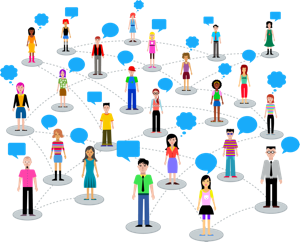

# File descriptions
**train.csv** - the training set for fault severity

**test.csv** - the test set for fault severity

**sample_submission.csv** - a sample submission file in the correct format

**event_type.csv** - event type related to the main dataset

**log_feature.csv** - features extracted from log files

**resource_type.csv** - type of resource related to the main dataset

**severity_type.csv** -  severity type of a warning message coming from the log

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
pd.set_option("display.max_columns",100)
import warnings
warnings.filterwarnings('ignore')

# Reading Files

In [2]:
event=pd.read_csv("event_type.csv")
log_feature=pd.read_csv("log_feature.csv")
resource=pd.read_csv("resource_type.csv")
severity=pd.read_csv("severity_type.csv")
train=pd.read_csv("train.csv")

### Merging 

In [3]:
from functools import reduce ###Data merging to create a single record 
dataframes=[event,log_feature,resource,severity,train]
df=reduce(lambda left,right:pd.merge(left,right,on="id"),dataframes)

# Exploratory Data Analysis and Feature Engineering

In [4]:
df.head()

,id,event_type,log_feature,volume,resource_type,severity_type,location,fault_severity
0,8011,event_type 15,feature 68,7,resource_type 8,severity_type 2,location 1,0
1,2588,event_type 15,feature 82,9,resource_type 8,severity_type 1,location 1,0
2,2588,event_type 15,feature 201,5,resource_type 8,severity_type 1,location 1,0
3,2588,event_type 15,feature 80,15,resource_type 8,severity_type 1,location 1,0
4,2588,event_type 15,feature 203,5,resource_type 8,severity_type 1,location 1,0


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 61839 entries, 0 to 61838
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              61839 non-null  int64 
 1   event_type      61839 non-null  object
 2   log_feature     61839 non-null  object
 3   volume          61839 non-null  int64 
 4   resource_type   61839 non-null  object
 5   severity_type   61839 non-null  object
 6   location        61839 non-null  object
 7   fault_severity  61839 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 4.2+ MB


In [6]:
df.shape

(61839, 8)

In [7]:
# there are so many duplicated variables on "id" column,dropping these fake datas to get real data
df.drop_duplicates(subset = 'id', inplace = True) 
df.shape

(7381, 8)

In [8]:
df.isnull().sum()

id                0
event_type        0
log_feature       0
volume            0
resource_type     0
severity_type     0
location          0
fault_severity    0
dtype: int64

In [9]:
 #Remove text from variables one linear of the following code
df.replace({"event_type ": "", "feature ":"", "resource_type ": "", "severity_type ":"","location":""}, regex=True, inplace=True)


In [10]:
df.sample(7)

,id,event_type,log_feature,volume,resource_type,severity_type,location,fault_severity
11892,11336,35,315,1,2,2,135,0
18989,7032,34,313,1,2,2,300,0
45136,2292,11,82,2,8,1,773,0
57247,4816,11,202,4,2,1,906,1
974,7385,11,170,5,8,1,1017,2
27568,6002,35,234,37,2,2,477,0
43042,12982,10,154,1,3,4,74,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7381 entries, 0 to 61837
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              7381 non-null   int64 
 1   event_type      7381 non-null   object
 2   log_feature     7381 non-null   object
 3   volume          7381 non-null   int64 
 4   resource_type   7381 non-null   object
 5   severity_type   7381 non-null   object
 6   location        7381 non-null   object
 7   fault_severity  7381 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 519.0+ KB


# Data Visualization

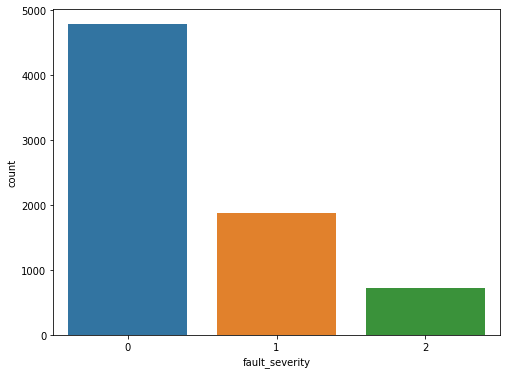

In [12]:
plt.figure(figsize = (8,6))
sns.countplot(df['fault_severity'])
plt.show()

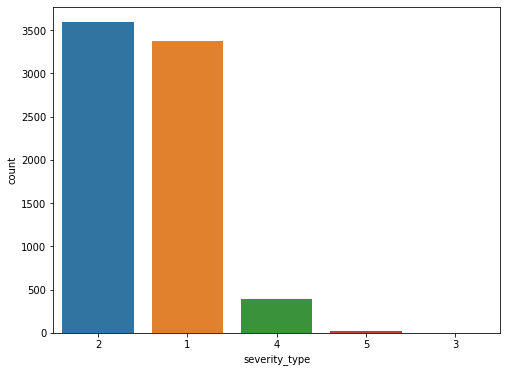

In [13]:
plt.figure(figsize = (8,6))
sns.countplot(df['severity_type'])
plt.show()

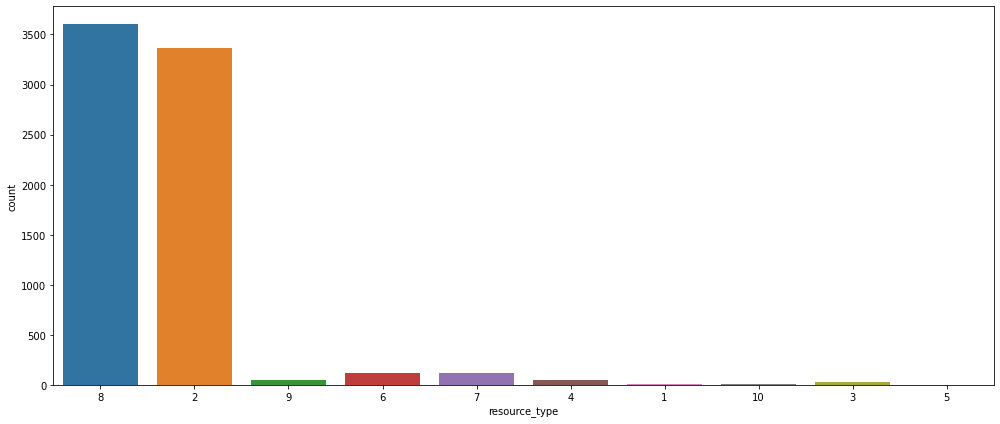

In [14]:
plt.figure(figsize = (14,6))
sns.countplot(df['resource_type'])
plt.tight_layout()
plt.show()

### Finding and Dropping Outliers

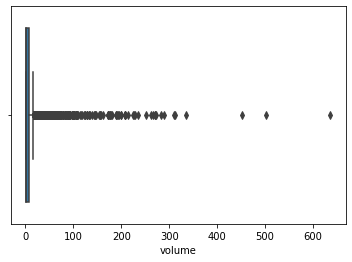

In [15]:
sns.boxplot( x =df.volume)

In [16]:
min_threshold , max_threshold = df["volume"].quantile([0.005,0.995])

In [17]:
df = df[(df["volume"] > min_threshold) & (df["volume"] < max_threshold) ]

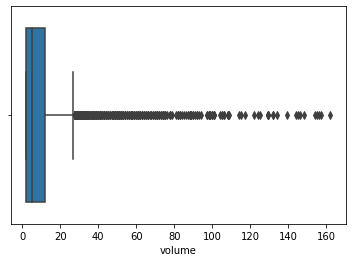

In [18]:
sns.boxplot( x =df.volume)

### Preparing Data for Machine Learning Algorithms

In [19]:
abs(df.corr()["fault_severity"]).sort_values(ascending=False)

fault_severity    1.000000
volume            0.022722
id                0.007799
Name: fault_severity, dtype: float64

In [20]:
df = df.set_index(df.id).drop('id',axis = 1)

In [21]:
x=df.drop(['fault_severity'],axis=1)

In [22]:
x=pd.get_dummies(x,drop_first=True)

In [23]:
x.head()

,volume,event_type_11,event_type_13,event_type_14,event_type_15,event_type_18,event_type_2,event_type_20,event_type_21,event_type_22,event_type_23,event_type_24,event_type_25,event_type_26,event_type_27,event_type_28,event_type_29,event_type_3,event_type_30,event_type_32,event_type_34,event_type_35,event_type_38,event_type_39,event_type_40,event_type_42,event_type_43,event_type_44,event_type_45,event_type_46,event_type_47,event_type_48,event_type_5,event_type_50,event_type_51,event_type_53,event_type_54,event_type_6,event_type_7,event_type_8,log_feature_101,log_feature_103,log_feature_105,log_feature_107,log_feature_108,log_feature_109,log_feature_111,log_feature_115,log_feature_117,log_feature_118,...,location_ 924,location_ 925,location_ 928,location_ 929,location_ 93,location_ 931,location_ 932,location_ 936,location_ 937,location_ 938,location_ 939,location_ 941,location_ 942,location_ 943,location_ 944,location_ 945,location_ 946,location_ 947,location_ 948,location_ 949,location_ 95,location_ 950,location_ 955,location_ 956,location_ 957,location_ 958,location_ 960,location_ 961,location_ 962,location_ 963,location_ 964,location_ 967,location_ 968,location_ 97,location_ 972,location_ 974,location_ 976,location_ 977,location_ 978,location_ 979,location_ 983,location_ 984,location_ 989,location_ 990,location_ 991,location_ 994,location_ 995,location_ 996,location_ 998,location_ 999
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8011,7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2588,9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4848,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6914,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5337,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
y=df['fault_severity']

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [26]:
def classification(x,y):
    

    k=KNeighborsClassifier()
    d=DecisionTreeClassifier()
    log=LogisticRegression()
    gbc=GradientBoostingClassifier()
    rf=RandomForestClassifier()
    xgb=XGBClassifier()
    ab=AdaBoostClassifier()

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
    
    algos=[k,d,log,gbc,rf,xgb]
    algos_name=['KNeigbors','DecisionTree','LogisticRegr','GradientBoosting','RandomForest','XGB']
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
   
    result=pd.DataFrame(columns=['AccuracyScore','PrecisionScore','RecallScore','f1_Score'],index=algos_name)
    
    for i in algos:
        
        predict=i.fit(x_train,y_train).predict(x_test)
        
        accuracy.append(accuracy_score(y_test,predict))
        precision.append(precision_score(y_test,predict,average='weighted'))
        recall.append(recall_score(y_test,predict,average='weighted'))
        f1.append(f1_score(y_test,predict,average='weighted'))
        

    
    
    result.AccuracyScore=accuracy
    result.PrecisionScore=precision
    result.RecallScore=recall
    result.f1_Score=f1
    
    
    return result.sort_values('f1_Score',ascending=False)

In [27]:
classification(x,y)

,AccuracyScore,PrecisionScore,RecallScore,f1_Score
LogisticRegr,0.708833,0.687193,0.708833,0.691040
RandomForest,0.691385,0.666968,0.691385,0.670845
GradientBoosting,0.704471,0.688319,0.704471,0.666747
XGB,0.705562,0.689720,0.705562,0.664784
KNeigbors,0.676118,0.650884,0.676118,0.652709
DecisionTree,0.665213,0.642020,0.665213,0.649508


### XGBoost Classifier

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=13)

In [29]:
xgb=XGBClassifier()
pred_xgb=xgb.fit(x_train,y_train).predict(x_test)
accuracy_score(y_test,pred_xgb),f1_score(y_test,pred_xgb,average='weighted')

(0.7350054525627044, 0.7002649969523782)

# Classification with PyCaret

In [30]:
!pip3 install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
pip install Jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
pip install pycaret --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
import jinja2

In [35]:
from pycaret.classification import*

In [36]:
exp=setup(data=df,target="fault_severity",session_id=1229,normalize=True)

,Description,Value
0,session_id,1229
1,Target,fault_severity
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(4583, 7)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='fault_severity',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numer...
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all'

In [37]:
compare_models(sort="AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7086,0.8360,0.5317,0.6834,0.6820,0.3459,0.3632,0.962
lightgbm,Light Gradient Boosting Machine,0.7017,0.8350,0.5582,0.6859,0.6909,0.3790,0.3823,0.283
rf,Random Forest Classifier,0.6839,0.8121,0.5392,0.6691,0.6746,0.3477,0.3498,0.655
et,Extra Trees Classifier,0.6674,0.7786,0.5203,0.6544,0.6596,0.3191,0.3204,0.620
knn,K Neighbors Classifier,0.6655,0.7591,0.4798,0.6330,0.6402,0.2628,0.2712,0.126
lr,Logistic Regression,0.6624,0.7396,0.3806,0.5990,0.5679,0.0938,0.1453,0.606
lda,Linear Discriminant Analysis,0.6612,0.7315,0.3794,0.6044,0.5687,0.0935,0.1428,0.025
ada,Ada Boost Classifier,0.6926,0.7212,0.5031,0.6622,0.6534,0.2895,0.3149,0.170
dt,Decision Tree Classifier,0.6387,0.6647,0.5120,0.6416,0.6395,0.2912,0.2918,0.025
nb,Naive Bayes,0.1690,0.6496,0.3648,0.6675,0.1041,0.0237,0.0784,0.019


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1229, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1229, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)